# Two-Sample and ANOVA Tests

# 1. Performing t-tests

<b>1.1 Hypothesis testing workflow</b>

You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

Place the hypothesis testing workflow steps in order from first to last.

![Alt text](Hypothesis%20testing%20workflow.png)

Regardless of the type of hypothesis test you are performing, it will have a workflow that follows this format.

<b>1.2 Two sample mean test statistic</b>

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

 
$$
  t = \frac{\bar{x}_{no}-\bar{x}_{yes}}{\sqrt{\frac{s_{no}^2}{n_{no}}+\frac{s_{yes}^2}{n_{yes}}}}
$$
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. 

In [23]:
# Import the late_shipment dataframe
import pandas as pd
import numpy as np

late_shipments = pd.read_feather("C:\\Users\\yazan\\Desktop\\Data_Analytics\\9-Introduction to Hypothesis Testing\\Datasets\\late_shipments.feather")
xbar = late_shipments.groupby('late_delivery')['weight_kilograms'].mean()
s = late_shipments.groupby('late_delivery')['weight_kilograms'].std()
n = late_shipments.groupby('late_delivery')['weight_kilograms'].count()

xbar_no = xbar[0]
xbar_yes = xbar[1]

s_no = s[0]
s_yes = s[1]

n_no = n[0]
n_yes = n[1]

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no**2/n_no) + (s_yes**2/n_yes))

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

# 2. Calculating p-values from t-statistics

<b>2.1 Why is t needed?</b>

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted , and the CDF transformation used the (standard normal) z-distribution. In this chapter, the test statistic was denoted , and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?

- The t-distribution is just another name for the z-distribution, so they can be used interchangeably.

- The t-distribution is the same thing as the z-distribution for very small sample sizes.

- <b><font color='green'>When a sample standard deviation is used in estimating a standard error.</font></b>

- When you are comparing the means of three or more samples, rather than comparing a single sample mean to a value.

Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

<b>2.2 The t-distribution</b>

The t-distribution is used to calculate the p-value from the <i>t</i> test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a normal distribution with the same mean and variance (gray dotted line).

Which statement about the the t-distribution is true?

- Like the normal distribution, the PDF of a central t-distribution is always symmetric.

- As you increase the degrees of freedom, the tails of the t-distribution get fatter.

- <b><font color='green'>As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.</font></b>

- As you increase the non-centrality, the t-distribution PDF and CDF curves get closer to those of a normal distribution.

The normal distribution is essentially a t-distribution with infinite degrees of freedom.

<b>2.3 From t to p</b>

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

<i>H<sub>o</suc></i>: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

<i>H<sub>A</suc></i>: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

<b>Question</b>

What type of test does the alternative hypothesis indicate that we need?

Possible Answers:

- Two-tailed

- <b><font color='green'>Left-tailed</font></b>

- Right-tailed

In [24]:
from scipy.stats import t

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


<b>Question</b>

What decision should you make based on the results of the hypothesis test?

Possible Answers

- Fail to reject the null hypothesis.

- <b><font color = 'green'>Reject the null hypothesis.</font></b>

- You can't conclude anything from this hypothesis test.

When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

# 3. Paired t-tests 

<b>3.1 Is pairing needed?</b>

t-tests are used to compare two sample means. However, the test involves different calculations depending upon whether the two samples are paired or not. To make sure you use the correct version of the t-test, you need to be able to identify pairing.

Match the problem description with whether a paired t-test or non-paired t-test should be conducted.


![Alt text](is%20pairing%20needed.png)

If you have repeated observations of something, then those observations form pairs.

<b>3.2 Visualizing the difference</b>

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

In [25]:
import pandas as pd
import numpy as np
sample_dem_data = pd.read_feather("C:\\Users\\yazan\\Desktop\\Data_Analytics\\9-Introduction to Hypothesis Testing\\Datasets\\dem_votes_potus_12_16.feather")
print(sample_dem_data.head())

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546


In [26]:
'''Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the 
percentage of votes for the democratic candidate in 2016.'''

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [27]:
'''Calculate the mean of the diff column as xbar_diff.'''

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106834


In [28]:
'''Calculate the standard deviation of the diff column as s_diff.'''

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132317


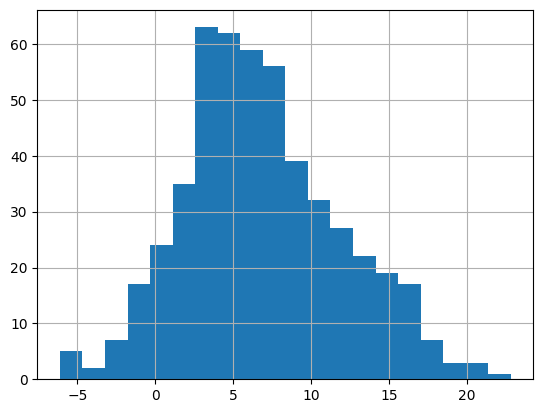

In [29]:
'''Plot a histogram of the diff column with 20 bins.'''

import matplotlib.pyplot as plt

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

 Notice that the majority of the histogram lies to the right of zero.

<b>3.3 Using ttest()</b>

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

<i>H<sub>o</sub></i> : The proportion of democratic votes in 2012 and 2016 were the same. 

<i>H<sub>A</sub></i> : The proportion of democratic votes in 2012 and 2016 were different.

In [30]:
'''Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate 
alternative hypothesis chosen from "two-sided", "less", and "greater".'''

import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(sample_dem_data['diff'], 
y=0,
alternative = 'two-sided')
       
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


<b>Question</b>

What's the correct decision from the t-test, assuming ?

Possible Answers:

- Fail to reject the null hypothesis.

- <b><font color = 'green'>Reject the null hypothesis.</font></b>

- You can't conclude anything from this hypothesis test.

In [31]:
'''Conduct a paired test on the democratic votes in 2012 and 2016 
(the dem_percent_12 and dem_percent_16 columns of sample_dem_data), 
using an appropriate alternative hypothesis.'''

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'],
                              paired = True,
                              alternative="two-sided")
                        
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


<b>Question</b>

Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?

In [33]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
unpaired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'],
                              paired = False,
                              alternative="two-sided")
                    
# Print the paired test results
print(unpaired_test_results)

               T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202   

             BF10  power  
T-test  4.308e+09    1.0  


Possible Answers:

- The p-value from the unpaired test is smaller than the p-value from the paired test.

- The p-value from the unpaired test is equal to the p-value from the paired test.

- <b><font color = 'green'>The p-value from the unpaired test is greater than than the p-value from the paired test.</font></b>